In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = r"D:\datasets\DL\cifar10_dataset"

In [3]:
img_height, img_width = 32, 32  
num_classes = 10
batch_size = 64
epochs = 20

In [4]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,     # Normalize pixel values to [0, 1]
    validation_split=0.2     # 80% training, 20% validation
)

In [5]:
train_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 48000 images belonging to 10 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 12000 images belonging to 10 classes.


In [7]:
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

C:\Users\Tanmay LImje\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20


C:\Users\Tanmay LImje\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 214s 282ms/step - accuracy: 0.1620 - loss: 2.2074 - val_accuracy: 0.2642 - val_loss: 1.9695
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 117us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4375 - val_loss: 1.8438
Epoch 3/20
  1/750 ━━━━━━━━━━━━━━━━━━━━ 1:21 109ms/step - accuracy: 0.2031 - loss: 1.9773

C:\Users\Tanmay LImje\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2182 - loss: 2.0472 - val_accuracy: 0.2864 - val_loss: 1.9211
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 2.0705
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2295 - loss: 2.0052 - val_accuracy: 0.2796 - val_loss: 1.9118
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1875 - val_loss: 1.9833
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2397 - loss: 1.9915 - val_accuracy: 0.2872 - val_loss: 1.8961
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2188 - val_loss: 1.8853
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2435 - loss: 1.9820 - val_accuracy: 0.3042 - val_loss: 1.9167
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - l

In [11]:
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=2)
print(f"Test accuracy: {test_accuracy}")

188/188 - 2s - 12ms/step - accuracy: 0.3130 - loss: 1.9041
Test accuracy: 0.31299999356269836


188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


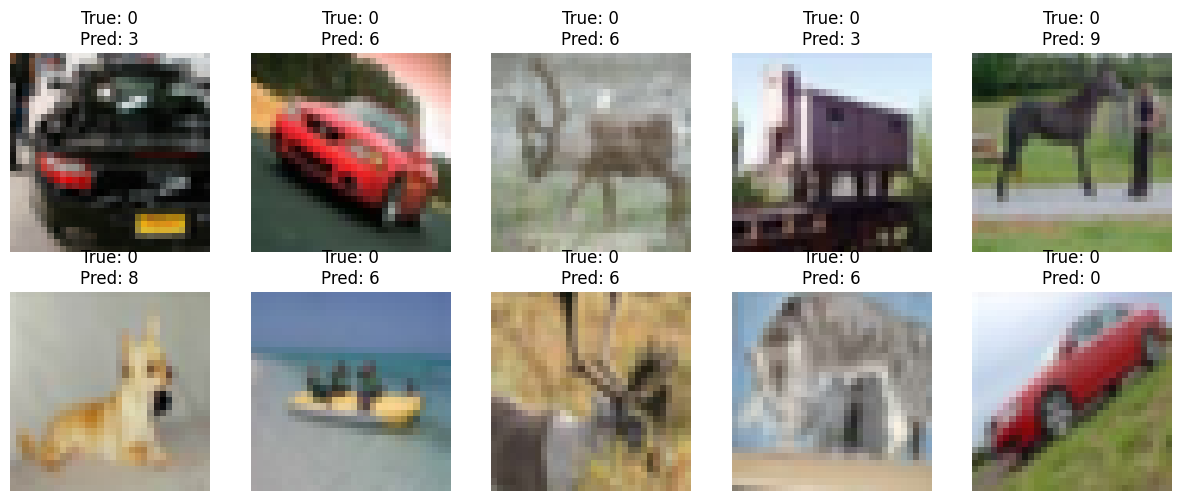

In [12]:
from matplotlib import pyplot as plt

predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Plot some predictions with actual and predicted labels
def plot_images(images, labels, predictions, class_labels, n=10):
    plt.figure(figsize=(15, 15))
    for i in range(n):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[labels[i]]
        predicted_label = class_labels[predictions[i]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Get a batch of images from the validation generator for display
val_images, _ = next(validation_generator)
plot_images(val_images, true_classes[:batch_size], predicted_classes[:batch_size], class_labels)